In [22]:
import tensorflow as tf

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
# Removing of the useless features 
col = ['Surname','CustomerId','RowNumber','Exited']
# Setting my dependent and Independent Variable
X = df.drop(columns=col)
y = df['Exited']

In [26]:
# Getting Dummy Values using the One Hot Encoding Method
gender = pd.get_dummies(X['Gender'],drop_first=True)
gender = gender.astype(int)
geography = pd.get_dummies(X['Geography'], drop_first=True)
geography = geography.astype(int)


In [27]:
# Now remove all the encoded labels
X = X.drop(['Geography','Gender'],axis=1)

In [29]:
# Now concatenate the Encoded colomns
X = pd.concat([X,gender,geography], axis=1)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
X_train.shape

(8000, 11)

# ANN Implementation

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #used to add layers 
from tensorflow.keras.layers import LeakyReLU,ELU,PReLU,ReLU
from tensorflow.keras.layers import Dropout


In [43]:
# Let's initialize ANN
classifier = Sequential()
# Adding the input layer
# look at the shape of the X_train we have 11 inputs bcz there are eleven colomns 
classifier.add(Dense(units=11,activation='relu'))

In [44]:
# First hidden layer
classifier.add(Dense(units=6,activation='relu'))
# Add second hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [45]:
# Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [53]:
# Now we are going to train our neural network
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
# Early Stoping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [58]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3071 - accuracy: 0.8748 - val_loss: 0.3643 - val_accuracy: 0.8557
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3067 - accuracy: 0.8761 - val_loss: 0.3652 - val_accuracy: 0.8527
Epoch 3/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3065 - accuracy: 0.8744 - val_loss: 0.3626 - val_accuracy: 0.8531
Epoch 4/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3068 - accuracy: 0.8761 - val_loss: 0.3645 - val_accuracy: 0.8542
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3072 - accuracy: 0.8750 - val_loss: 0.3612 - val_accuracy: 0.8546
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3065 - accuracy: 0.8767 - val_loss: 0.3641 - val_accuracy: 0.8519
Epoch 7/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3062 - accuracy: 0.8737 - val_loss: 0.3618 - val_accuracy:

In [56]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

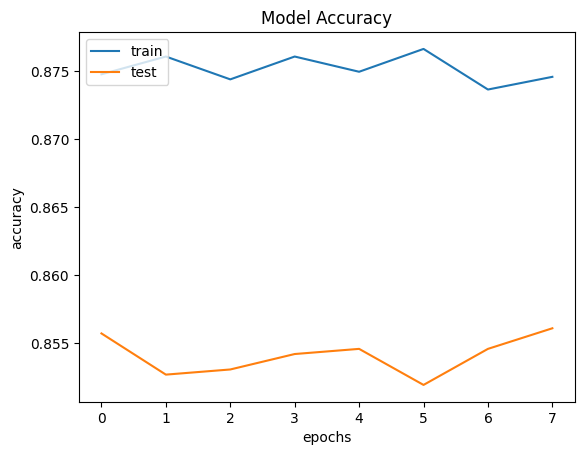

In [59]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()